<a href="https://colab.research.google.com/github/netobrandao/Atividades-Alura/blob/main/Customizando_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
sns.set_style('white')

In [18]:
# Lendo os dados
df_aluguel = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv')
df_bicicletas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/contagem_bicicletas.csv')

# Atividade 1

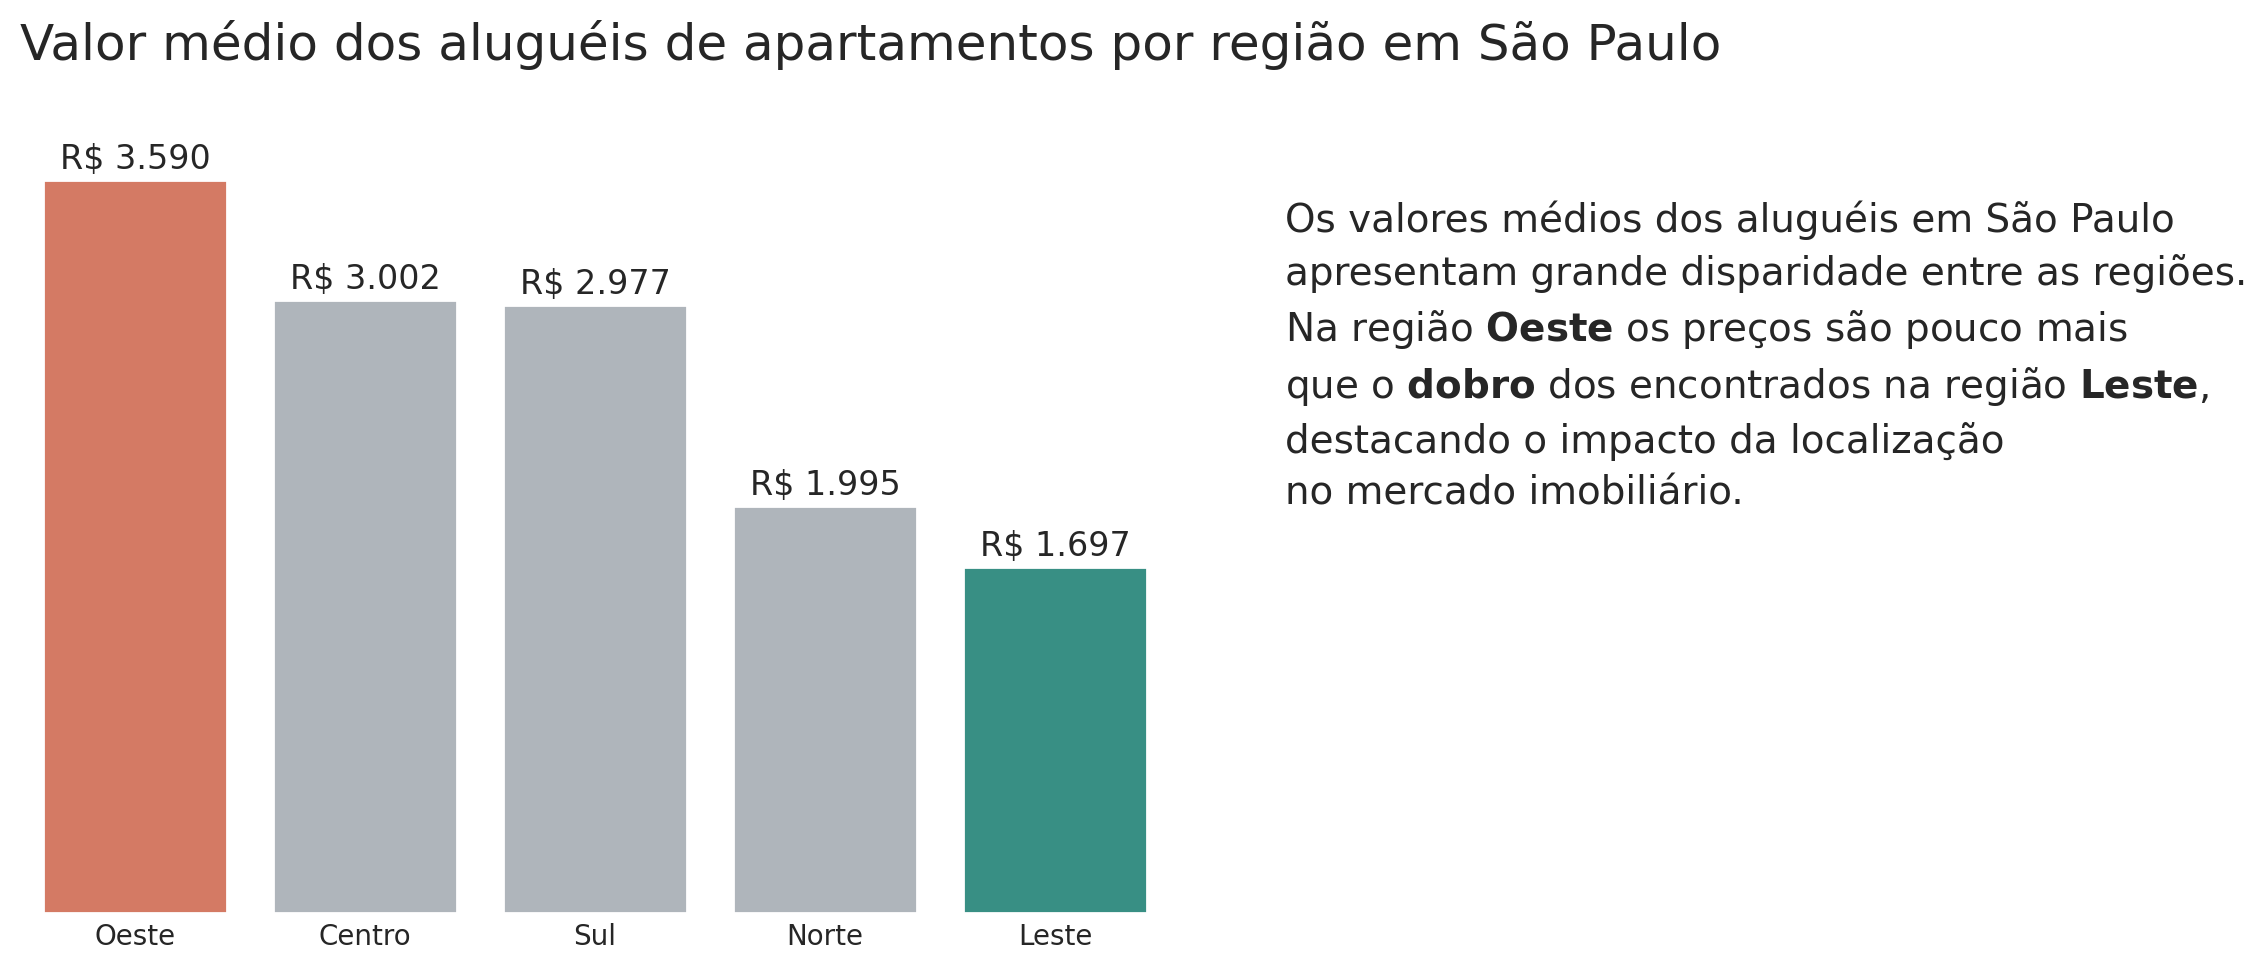

In [19]:
#Grafico de Barras de Aluguel

#Tratando os dados
df_aluguel = df_aluguel.groupby(['Regiao'])['Valor'].mean().reset_index().sort_values(by="Valor",ascending=False)
df_aluguel = df_aluguel.head(10)

#Paleta de cores
VERMELHO1,CINZA3,VERDE2 = '#e76f51','#adb5bd','#2a9d8f'
cores = [VERMELHO1, CINZA3, CINZA3, CINZA3, VERDE2]

# Definindo o tamanho do grafico
fig,ax = plt.subplots(figsize=(10,5),dpi=200)
fig.subplots_adjust(right=0.7) #deixando mais espaço a direita

# Construindo o grafico de colunas
ax = sns.barplot(data=df_aluguel,x='Regiao',y='Valor',hue='Regiao',palette=cores)

# Adicionando título ao gráfico
ax.set_title('Valor médio dos aluguéis de apartamentos por região em São Paulo', pad=30, fontsize=18, loc='left')

# Parametros do grafico
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.tick_params(length=0)

# Inserindo os valores medios de aluguel por região no topo da coluna
for i, valor in enumerate(df_aluguel['Valor']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 100
    ax.text(i, valor + offset, qtd, fontsize=12, ha='center', va='center')

# Anotando uma conclusão no gráfico
ax.text(5, 2000,
        'Os valores médios dos aluguéis em São Paulo\n'
        'apresentam grande disparidade entre as regiões.\n'
        'Na região $\\bf{Oeste}$ os preços são pouco mais\n'
        'que o $\\bf{dobro}$ dos encontrados na região $\\bf{Leste}$,\n'
        'destacando o impacto da localização\n'
        'no mercado imobiliário.',
         fontsize=14,
         linespacing=1.45)

# Exibindo o gráfico
plt.show()

# Atividade 2

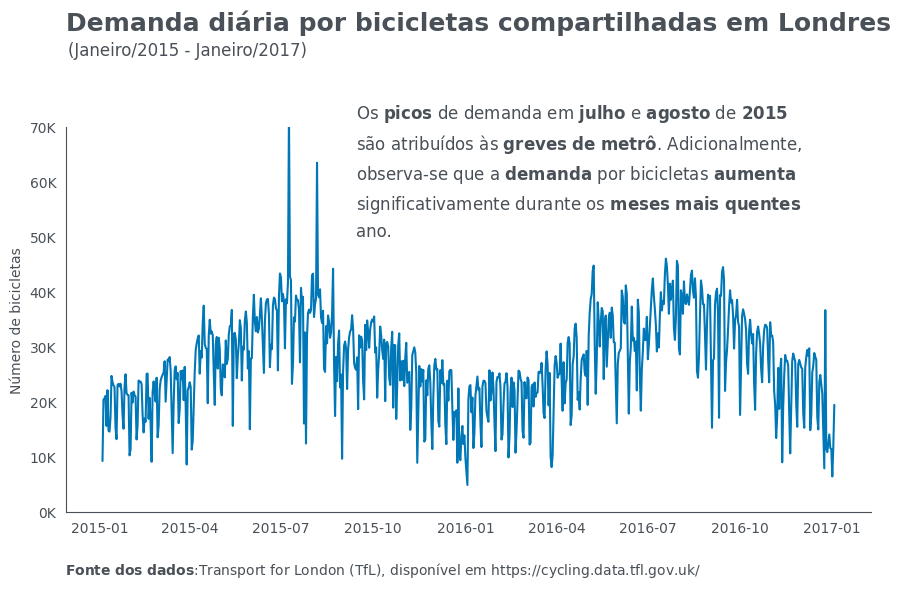

In [20]:
# Tratando os dados
df_bicicletas['data_hora'] = pd.to_datetime(df_bicicletas['data_hora'])
df_bicicletas['data'] = df_bicicletas['data_hora'].dt.date
contagem_bicicletas_data = df_bicicletas.groupby('data')['contagem'].sum().reset_index()


# Definindo as paletas de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2, VERDE3 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f', '#264653'


# Criando a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(14,5))

# Ajustando o layout da figura para deixar mais espaço à direita
fig.subplots_adjust(right=0.7)

# Criando o gráfico de linhas
ax = sns.lineplot(data=contagem_bicicletas_data, x='data', y='contagem', color=AZUL2)

# Adicionando título ao gráfico
ax.set_title('Demanda diária por bicicletas compartilhadas em Londres', pad=70, fontsize=18, loc='left', color=CINZA2, weight='bold')

# Adicionando texto abaixo do título
ax.text(0.30, 1.20, '(Janeiro/2015 - Janeiro/2017)', transform=ax.transAxes, fontsize=12, ha='right', va='center', color=CINZA2)

# Ocultando o rótulo do eixo X
ax.set_xlabel('')

# Alterando o rótulo do eixo Y
ax.set_ylabel('Número de bicicletas', color=CINZA2)

# Alterando a cor dos ticks nos eixos
ax.tick_params(axis='both', colors=CINZA2)  # Aplica cor aos ticks de ambos os eixos

# Adicionando texto ao final do gráfico
ax.text(0.79, -0.15, '$\\bf{Fonte}$ $\\bf{dos}$ $\\bf{dados}$:Transport for London (TfL), disponível em https://cycling.data.tfl.gov.uk/', transform=ax.transAxes, fontsize=10, ha='right', va='center', color=CINZA2)

# Adicionando texto informativo
ax.text(0.36, 0.65,
        'Os $\\bf{picos}$ de demanda em $\\bf{julho}$ e $\\bf{agosto}$ de $\\bf{2015}$\n'
        'são atribuídos às $\\bf{greves}$ $\\bf{de}$ $\\bf{metrô}$. Adicionalmente,\n'
        'observa-se que a $\\bf{demanda}$ por bicicletas $\\bf{aumenta}$\n'
        'significativamente durante os $\\bf{meses}$ $\\bf{mais}$ $\\bf{quentes}$\n'
        'ano.\n',
        transform=ax.transAxes,
        fontsize=12,
        linespacing=1.5,
        color=CINZA2)

# Removendo bordas do gráfico
sns.despine()

# Função para converter valor numérico para string no formato desejado
def para_k(val, pos):
    return f'{int(val/1000)}K'

# Configurando o formatador para o eixo y
formatter = FuncFormatter(para_k)
plt.gca().yaxis.set_major_formatter(formatter)

# Definindo o início do eixo Y
plt.ylim(0, 70000)

# Alterando a cor dos spines
for spine in ax.spines.values():
    spine.set_color(CINZA2)

# Exibindo o gráfico
plt.show()
